In [19]:
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib
rcParams.update({'figure.autolayout': True})
rcParams['svg.fonttype'] = 'none'
rcParams['font.size']=10

In [15]:
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False),
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [4]:
microglia_regression = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/model_7.hdf5", compile = False)
microglia_classifier = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/classification_model_4.hdf5", compile = False)

neuron_regression = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/model_2.hdf5", compile = False)
neuron_classifier = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_fullard_neun/classification_model_4.hdf5", compile = False)

gm_regression = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/model_11_hg19.hdf5", compile = False)
gm_classifier = load_model("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_lcl/classification_model_8.hdf5", compile = False)

In [5]:
kunkleetal_bin1_ref_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/kunkleetal_snps_overlapping_bin1_rough_region_reference.npy")
kunkleetal_bin1_alt_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/kunkleetal_snps_overlapping_bin1_rough_region_alternate.npy")

jansenetal_bin1_ref_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/jansenetal_snps_overlapping_bin1_rough_region_reference.npy")
jansenetal_bin1_alt_sequences = np.load("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/jansenetal_snps_overlapping_bin1_rough_region_alternate.npy")

In [6]:
microglia_regression_kunkleetal_bin1_ref_sequences_scores = microglia_regression.predict(kunkleetal_bin1_ref_sequences) 
microglia_regression_kunkleetal_bin1_alt_sequences_scores = microglia_regression.predict(kunkleetal_bin1_alt_sequences)

microglia_classifier_kunkleetal_bin1_ref_sequences_scores = microglia_classifier.predict_proba(kunkleetal_bin1_ref_sequences)
microglia_classifier_kunkleetal_bin1_alt_sequences_scores = microglia_classifier.predict_proba(kunkleetal_bin1_alt_sequences)

In [7]:
neuron_regression_kunkleetal_bin1_ref_sequences_scores = neuron_regression.predict(kunkleetal_bin1_ref_sequences) 
neuron_regression_kunkleetal_bin1_alt_sequences_scores = neuron_regression.predict(kunkleetal_bin1_alt_sequences)

neuron_classifier_kunkleetal_bin1_ref_sequences_scores = neuron_classifier.predict_proba(kunkleetal_bin1_ref_sequences)
neuron_classifier_kunkleetal_bin1_alt_sequences_scores = neuron_classifier.predict_proba(kunkleetal_bin1_alt_sequences)

In [8]:
gm_regression_kunkleetal_bin1_ref_sequences_scores = gm_regression.predict(kunkleetal_bin1_ref_sequences) 
gm_regression_kunkleetal_bin1_alt_sequences_scores = gm_regression.predict(kunkleetal_bin1_alt_sequences)

gm_classifier_kunkleetal_bin1_ref_sequences_scores = gm_classifier.predict_proba(kunkleetal_bin1_ref_sequences)
gm_classifier_kunkleetal_bin1_alt_sequences_scores = gm_classifier.predict_proba(kunkleetal_bin1_alt_sequences)

In [9]:
jansenetal_bin1_snp_info = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/jansenetal_snps_overlapping_bin1_rough_region_hg38_alleles_updated.txt", sep="\t", names=["CHR","START", "END","RSID","A1", "A2", "P", "Z"], header=None)
kunkleetal_bin1_snp_info = pd.read_csv("/projects/pfenninggroup/machineLearningForComputationalBiology/eramamur_stuff/ml_gosselin_microglia/kunkleetal_snps_overlapping_bin1_rough_region_hg38_alleles_updated.txt", sep="\t", names=["CHR","START", "END","RSID","A1", "A2", "P", "Z"], header=None)

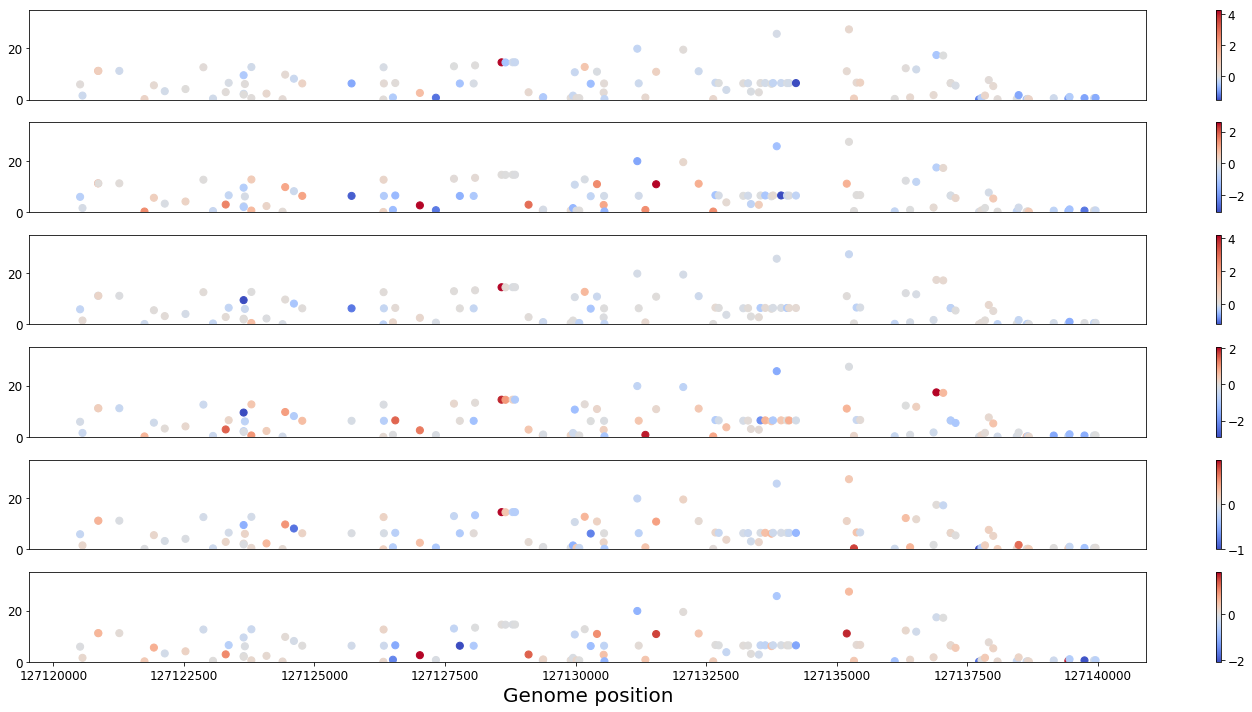

In [111]:
fig,axs = plt.subplots(6,1, figsize=(20,10))
fig.subplots_adjust(hspace=0)

vmax = np.amax(microglia_regression_kunkleetal_bin1_ref_sequences_scores-microglia_regression_kunkleetal_bin1_alt_sequences_scores)
vmin = np.amin(microglia_regression_kunkleetal_bin1_ref_sequences_scores-microglia_regression_kunkleetal_bin1_alt_sequences_scores)
vmid = 1 - vmax / (vmax + abs(vmin))
new_cmap = shiftedColorMap(matplotlib.cm.coolwarm, midpoint=vmid, name='shrunk')


im = axs[0].scatter(kunkleetal_bin1_snp_info["END"], -np.log10(kunkleetal_bin1_snp_info["P"]), c=(microglia_regression_kunkleetal_bin1_ref_sequences_scores-microglia_regression_kunkleetal_bin1_alt_sequences_scores).flatten(), cmap=new_cmap, s=50)
axs[0].tick_params(axis='both', which='major', labelsize=12)
axs[0].set_xticks([])
axs[0].set_ylim([0,35])
cb = fig.colorbar(im,ax=axs[0])
cb.ax.tick_params(labelsize=12)

vmax = np.amax(np.log2(microglia_classifier_kunkleetal_bin1_ref_sequences_scores/microglia_classifier_kunkleetal_bin1_alt_sequences_scores))
vmin = np.amin(np.log2(microglia_classifier_kunkleetal_bin1_ref_sequences_scores/microglia_classifier_kunkleetal_bin1_alt_sequences_scores))
vmid = 1 - vmax / (vmax + abs(vmin))
new_cmap = shiftedColorMap(matplotlib.cm.coolwarm, midpoint=vmid, name='shrunk')

im = axs[1].scatter(kunkleetal_bin1_snp_info["END"], -np.log10(kunkleetal_bin1_snp_info["P"]), c=np.log2(microglia_classifier_kunkleetal_bin1_ref_sequences_scores/microglia_classifier_kunkleetal_bin1_alt_sequences_scores).flatten(), cmap=new_cmap, s=50)
axs[1].tick_params(axis='both', which='major', labelsize=12)
axs[1].set_xticks([])
axs[1].set_ylim([0,35])
cb = fig.colorbar(im,ax=axs[1])
cb.ax.tick_params(labelsize=12)


vmax = np.amax(neuron_regression_kunkleetal_bin1_ref_sequences_scores-neuron_regression_kunkleetal_bin1_alt_sequences_scores)
vmin = np.amin(neuron_regression_kunkleetal_bin1_ref_sequences_scores-neuron_regression_kunkleetal_bin1_alt_sequences_scores)
vmid = 1 - vmax / (vmax + abs(vmin))
new_cmap = shiftedColorMap(matplotlib.cm.coolwarm, midpoint=vmid, name='shrunk')


im = axs[2].scatter(kunkleetal_bin1_snp_info["END"], -np.log10(kunkleetal_bin1_snp_info["P"]), c=(neuron_regression_kunkleetal_bin1_ref_sequences_scores-neuron_regression_kunkleetal_bin1_alt_sequences_scores).flatten(), cmap=new_cmap, s=50)
axs[2].tick_params(axis='both', which='major', labelsize=12)
axs[2].set_xticks([])
axs[2].set_ylim([0,35])
cb = fig.colorbar(im,ax=axs[2])
cb.ax.tick_params(labelsize=12)

vmax = np.amax(np.log2(neuron_classifier_kunkleetal_bin1_ref_sequences_scores/neuron_classifier_kunkleetal_bin1_alt_sequences_scores))
vmin = np.amin(np.log2(neuron_classifier_kunkleetal_bin1_ref_sequences_scores/neuron_classifier_kunkleetal_bin1_alt_sequences_scores))
vmid = 1 - vmax / (vmax + abs(vmin))
new_cmap = shiftedColorMap(matplotlib.cm.coolwarm, midpoint=vmid, name='shrunk')



im = axs[3].scatter(kunkleetal_bin1_snp_info["END"], -np.log10(kunkleetal_bin1_snp_info["P"]), c=(np.log2(neuron_classifier_kunkleetal_bin1_ref_sequences_scores/neuron_classifier_kunkleetal_bin1_alt_sequences_scores).flatten()), cmap=new_cmap, s=50)
axs[3].tick_params(axis='both', which='major', labelsize=12)
axs[3].set_xticks([])
axs[3].set_ylim([0,35])
cb = fig.colorbar(im,ax=axs[3])
cb.ax.tick_params(labelsize=12)



vmax = np.amax(gm_regression_kunkleetal_bin1_ref_sequences_scores-gm_regression_kunkleetal_bin1_alt_sequences_scores)
vmin = np.amin(gm_regression_kunkleetal_bin1_ref_sequences_scores-gm_regression_kunkleetal_bin1_alt_sequences_scores)
vmid = 1 - vmax / (vmax + abs(vmin))
new_cmap = shiftedColorMap(matplotlib.cm.coolwarm, midpoint=vmid, name='shrunk')



im = axs[4].scatter(kunkleetal_bin1_snp_info["END"], -np.log10(kunkleetal_bin1_snp_info["P"]), c=(gm_regression_kunkleetal_bin1_ref_sequences_scores-gm_regression_kunkleetal_bin1_alt_sequences_scores).flatten(), cmap=new_cmap,s=50)
axs[4].tick_params(axis='both', which='major', labelsize=12)
axs[4].set_xticks([])
axs[4].set_ylim([0,35])
cb = fig.colorbar(im,ax=axs[4])
cb.ax.tick_params(labelsize=12)


vmax = np.amax(np.log2(gm_classifier_kunkleetal_bin1_ref_sequences_scores/gm_classifier_kunkleetal_bin1_alt_sequences_scores))
vmin = np.amin(np.log2(gm_classifier_kunkleetal_bin1_ref_sequences_scores/gm_classifier_kunkleetal_bin1_alt_sequences_scores))
vmid = 1 - vmax / (vmax + abs(vmin))
new_cmap = shiftedColorMap(matplotlib.cm.coolwarm, midpoint=vmid, name='shrunk')

im = axs[5].scatter(kunkleetal_bin1_snp_info["END"], -np.log10(kunkleetal_bin1_snp_info["P"]), c=(np.log2(gm_classifier_kunkleetal_bin1_ref_sequences_scores/gm_classifier_kunkleetal_bin1_alt_sequences_scores).flatten()), cmap=new_cmap,s=50)
axs[5].set_xlabel("Genome position",size=20)
axs[5].tick_params(axis='both', which='major', labelsize=12)
axs[5].ticklabel_format(style='plain', useOffset=False)
axs[5].set_ylim([0,35])
cb = fig.colorbar(im,ax=axs[5])
cb.ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig("combined_bin1_scores.png")
plt.savefig("combined_bin1_scores.svg")

plt.ylabel("Microglia regression predicted scores")
plt.scatter(range(len(microglia_regression_kunkleetal_bin1_alt_sequences_scores)), sorted(np.absolute(microglia_regression_kunkleetal_bin1_ref_sequences_scores-microglia_regression_kunkleetal_bin1_alt_sequences_scores).flatten()))

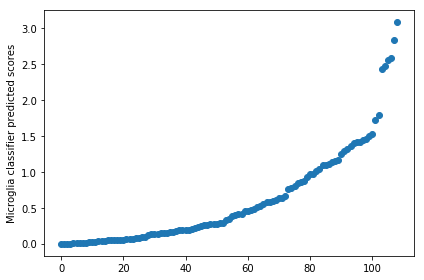

In [16]:
plt.ylabel("Microglia classifier predicted scores")
plt.scatter(range(len(microglia_regression_kunkleetal_bin1_alt_sequences_scores)), sorted(np.absolute(np.log2(microglia_classifier_kunkleetal_bin1_ref_sequences_scores/microglia_classifier_kunkleetal_bin1_alt_sequences_scores).flatten())))

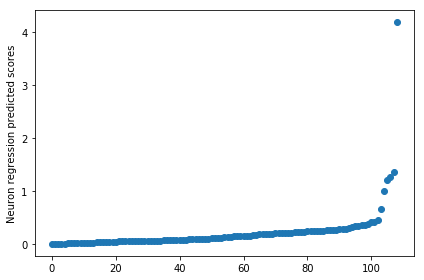

In [18]:
plt.ylabel("Neuron regression predicted scores")
plt.scatter(range(len(neuron_regression_kunkleetal_bin1_alt_sequences_scores)), sorted(np.absolute(neuron_regression_kunkleetal_bin1_ref_sequences_scores-neuron_regression_kunkleetal_bin1_alt_sequences_scores).flatten()))

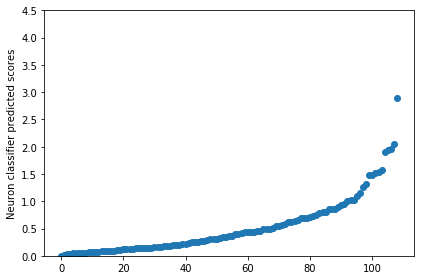

In [25]:
plt.ylabel("Neuron classifier predicted scores")
plt.ylim([0,4.5])
plt.scatter(range(len(neuron_classifier_kunkleetal_bin1_alt_sequences_scores)), sorted(np.absolute(np.log2(neuron_classifier_kunkleetal_bin1_ref_sequences_scores/neuron_classifier_kunkleetal_bin1_alt_sequences_scores).flatten())))

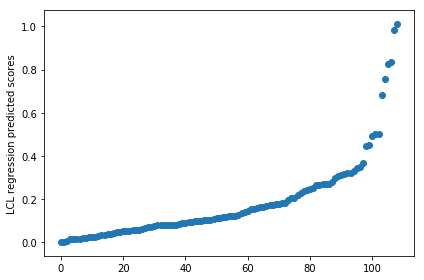

In [22]:
plt.ylabel("LCL regression predicted scores")
plt.scatter(range(len(gm_regression_kunkleetal_bin1_alt_sequences_scores)), sorted(np.absolute(gm_regression_kunkleetal_bin1_ref_sequences_scores-gm_regression_kunkleetal_bin1_alt_sequences_scores).flatten()))

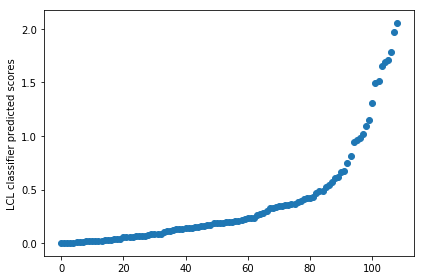

In [24]:
plt.ylabel("LCL classifier predicted scores")
plt.scatter(range(len(gm_classifier_kunkleetal_bin1_alt_sequences_scores)), sorted(np.absolute(np.log2(gm_classifier_kunkleetal_bin1_ref_sequences_scores/gm_classifier_kunkleetal_bin1_alt_sequences_scores).flatten())))